##### <div style="color:brown;background-color:gold;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">Retail Sales(mcdonald)</div>

## <a id="100" style="color:gold">Importing packages :</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

 ## <a id="100" style="color:gold">Loading Dataset :</a>

In [2]:
data = pd.read_csv('menu.csv')

In [3]:
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [5]:
data.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

 ## <a id="100" style="color:gold">Exploratory Data Analysis (EDA) :</a>

#### I'll combine every two elements that close together  in one DataFrame

In [6]:
vit_A_per_food = data.pivot_table('Vitamin A (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
vit_C_per_food = data.pivot_table('Vitamin C (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
vita = pd.merge(vit_A_per_food, vit_C_per_food)
vita

,Category,Vitamin A (% Daily Value),Vitamin C (% Daily Value)
0,Beef & Pork,6.933333,7.333333
1,Beverages,0.740741,23.481481
2,Breakfast,6.928571,8.904762
3,Chicken & Fish,20.444444,12.629630
4,Coffee & Tea,10.736842,0.000000
5,Desserts,5.142857,4.142857
6,Salads,146.666667,28.333333
7,Smoothies & Shakes,18.750000,6.964286
8,Snacks & Sides,4.846154,28.153846


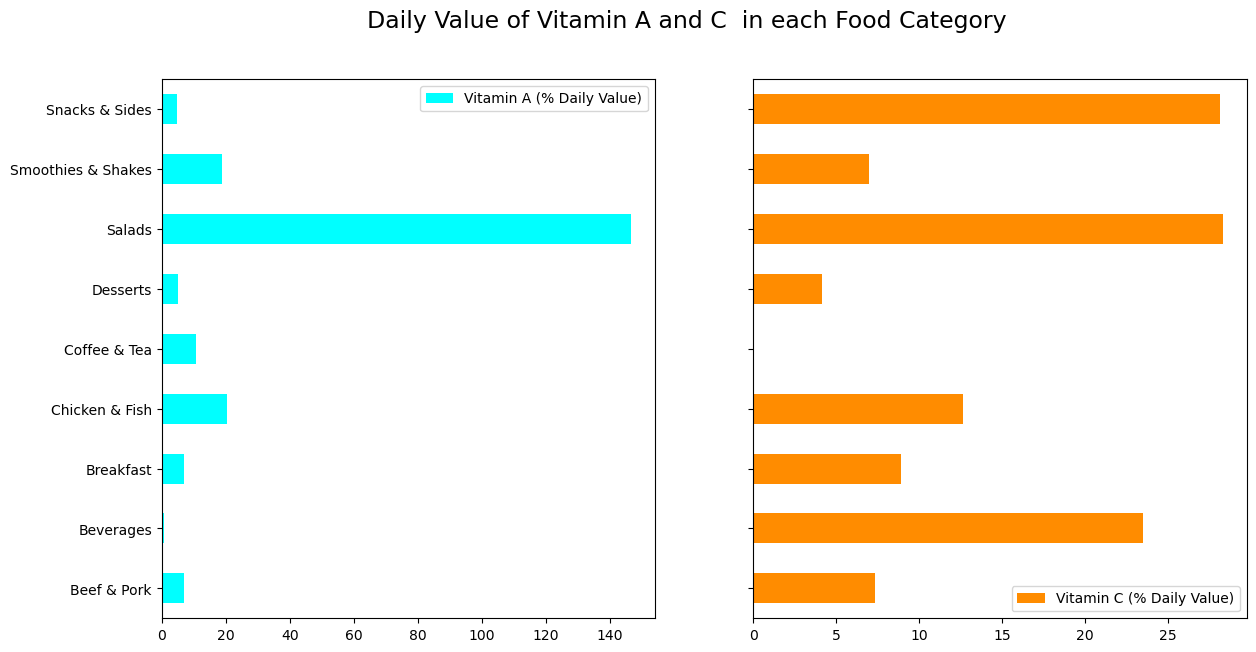

In [7]:
n=9
r = np.arange(n)
fig , (ax1, ax2) =plt.subplots(1,2, figsize=(14,7) , sharey=True)
vit_A_per_food.plot(kind='barh', ax=ax1, color='aqua')
vit_C_per_food.plot(kind='barh', ax=ax2, color='darkorange')
plt.yticks(r,vita['Category'])
fig.suptitle('Daily Value of Vitamin A and C  in each Food Category', fontsize=17)
plt.show()
plt.show()

In [8]:
chol_per_food = data.pivot_table('Cholesterol (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
Na_per_food     = data.pivot_table('Sodium (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
cardio = pd.merge(chol_per_food, Na_per_food)
cardio

,Category,Cholesterol (% Daily Value),Sodium (% Daily Value)
0,Beef & Pork,28.933333,42.466667
1,Beverages,0.185185,1.740741
2,Breakfast,50.952381,50.500000
3,Chicken & Fish,25.222222,52.333333
4,Coffee & Tea,9.378947,5.726316
5,Desserts,4.857143,5.000000
6,Salads,17.333333,24.500000
7,Smoothies & Shakes,14.714286,7.785714
8,Snacks & Sides,6.230769,16.461538


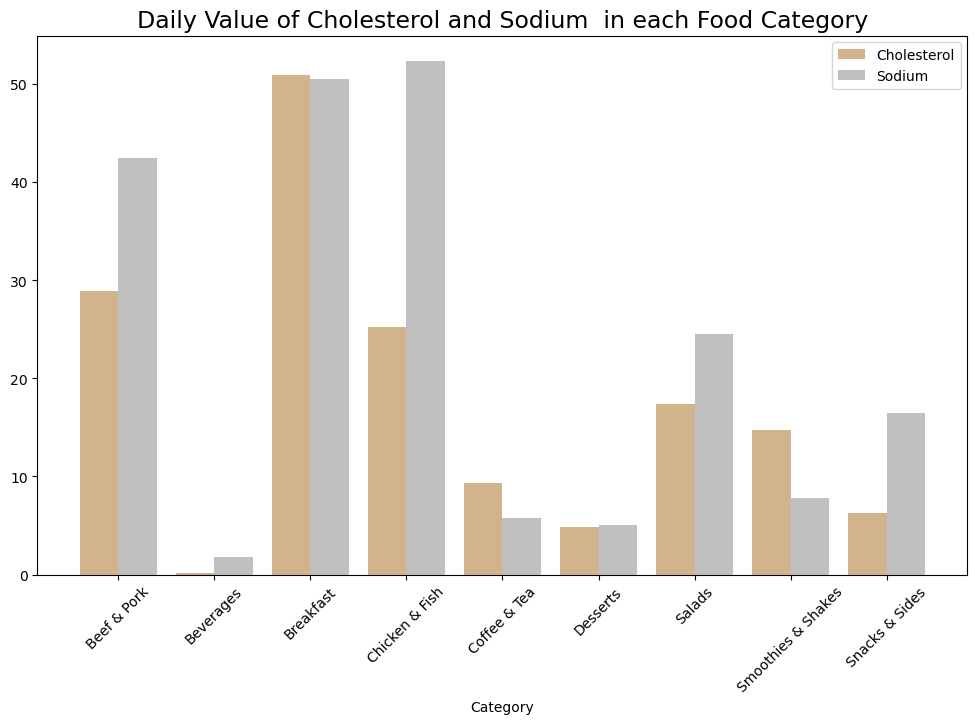

In [9]:
n=9
r = np.arange(n)
width = 0.20
plt.figure(figsize=(12,7))
plt.bar(r-width ,cardio["Cholesterol (% Daily Value)"],width=0.4, label = 'Cholesterol', color='tan')
plt.bar(r + width ,cardio["Sodium (% Daily Value)"],width=0.4, label = 'Sodium', color='silver')
plt.xticks(r, cardio['Category'], rotation=45)
plt.xlabel('Category')
plt.legend()
plt.title('Daily Value of Cholesterol and Sodium  in each Food Category', fontsize=17)
plt.show()

In [10]:
charb_per_food = data.pivot_table('Carbohydrates (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
fieb_per_food     = data.pivot_table('Dietary Fiber (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
charb = pd.merge(charb_per_food, fieb_per_food)
charb

,Category,Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value)
0,Beef & Pork,13.466667,9.866667
1,Beverages,9.592593,0.074074
2,Breakfast,16.571429,12.833333
3,Chicken & Fish,16.333333,11.814815
4,Coffee & Tea,14.863158,3.178947
5,Desserts,11.571429,3.428571
6,Salads,7.166667,18.500000
7,Smoothies & Shakes,30.142857,5.750000
8,Snacks & Sides,9.615385,7.076923


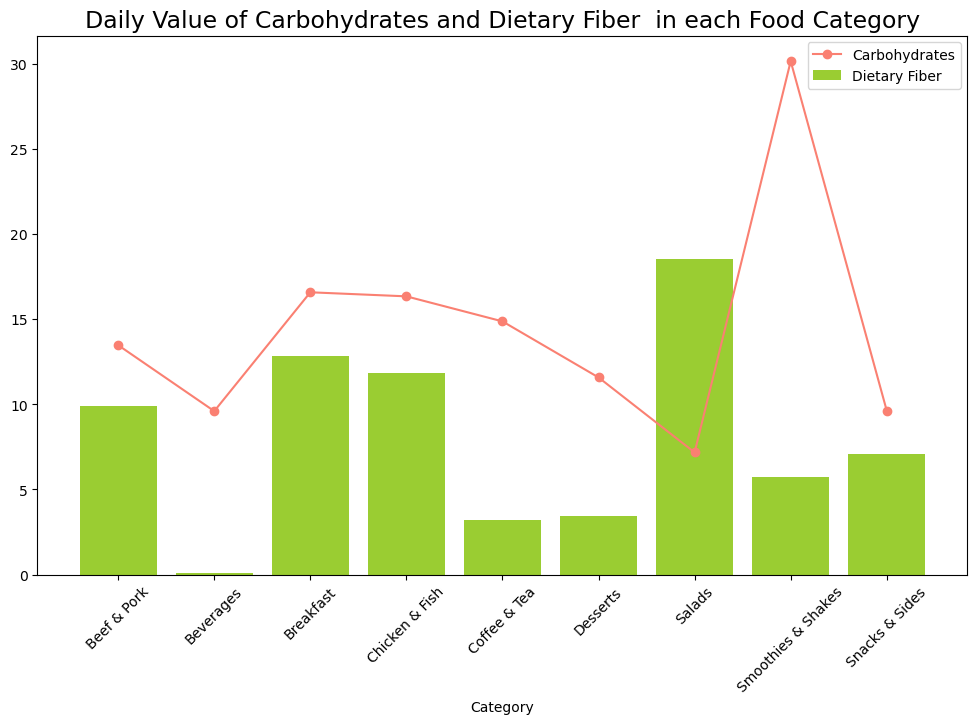

In [11]:
width = 0.20
plt.figure(figsize=(12,7))
plt.plot(r ,charb["Carbohydrates (% Daily Value)"], 'o-', label = 'Carbohydrates', color='salmon')
plt.bar(r  ,charb["Dietary Fiber (% Daily Value)"], label = 'Dietary Fiber', color='yellowgreen')
plt.xticks(r, charb['Category'], rotation=45)
plt.xlabel('Category')
plt.legend()
plt.title('Daily Value of Carbohydrates and Dietary Fiber  in each Food Category', fontsize=17)
plt.show()

In [12]:
cal_per_food  = data.pivot_table('Calcium (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
iron_per_food = data.pivot_table('Iron (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
minerals = pd.merge(cal_per_food, iron_per_food)
minerals

,Category,Calcium (% Daily Value),Iron (% Daily Value)
0,Beef & Pork,23.000000,23.333333
1,Beverages,2.962963,0.296296
2,Breakfast,16.166667,17.142857
3,Chicken & Fish,15.444444,16.370370
4,Coffee & Tea,28.294737,2.147368
5,Desserts,11.428571,4.000000
6,Salads,15.000000,10.333333
7,Smoothies & Shakes,35.571429,3.964286
8,Snacks & Sides,6.000000,6.615385


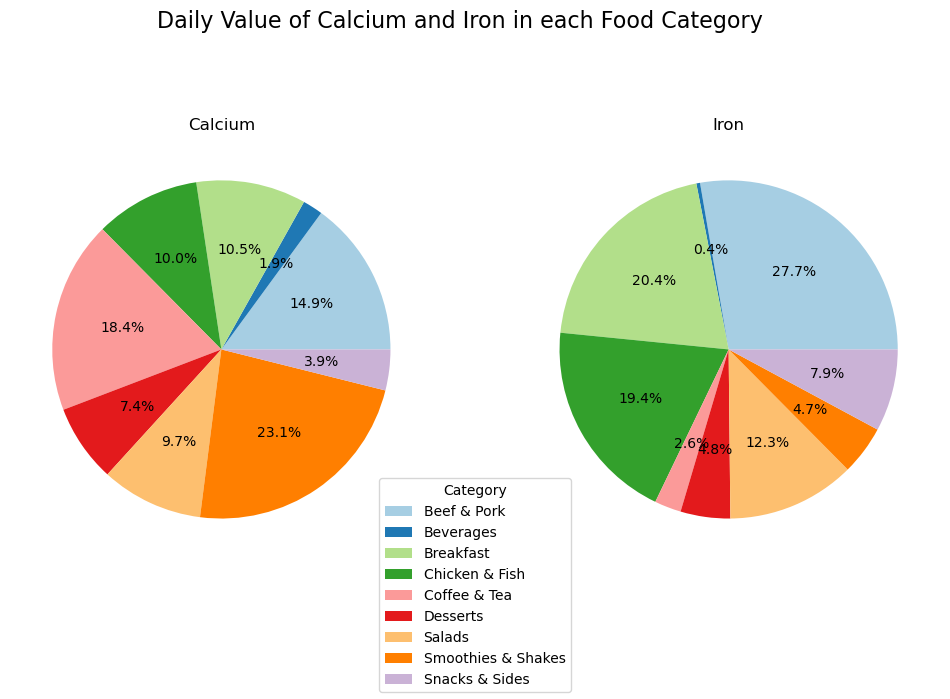

In [13]:
fig, (ax1, ax2 )= plt.subplots(1, 2, figsize=(12,7))
ax1.pie(minerals["Calcium (% Daily Value)"], autopct='%1.1f%%',pctdistance=0.6, colors=sns.color_palette("Paired") )
ax1.set_title('Calcium')
ax2.pie(minerals["Iron (% Daily Value)"], autopct='%1.1f%%',pctdistance=0.6,colors=sns.color_palette("Paired") )
ax2.set_title('Iron')
fig.legend(minerals['Category'],title ="Category", loc ="lower center",)
fig.suptitle('Daily Value of Calcium and Iron in each Food Category', fontsize=16)
plt.show()

In [14]:
total_fat_per_food = data.pivot_table('Total Fat (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
Saturct_Fat_per_food = data.pivot_table('Saturated Fat (% Daily Value)',"Category", aggfunc=np.mean).reset_index()
fat = pd.merge(total_fat_per_food, Saturct_Fat_per_food)
fat

,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value)
0,Beef & Pork,38.600000,52.000000
1,Beverages,0.148148,0.296296
2,Breakfast,42.666667,53.428571
3,Chicken & Fish,41.333333,31.111111
4,Coffee & Tea,12.357895,24.368421
5,Desserts,11.142857,21.285714
6,Salads,18.333333,18.500000
7,Smoothies & Shakes,21.714286,41.785714
8,Snacks & Sides,16.230769,13.384615


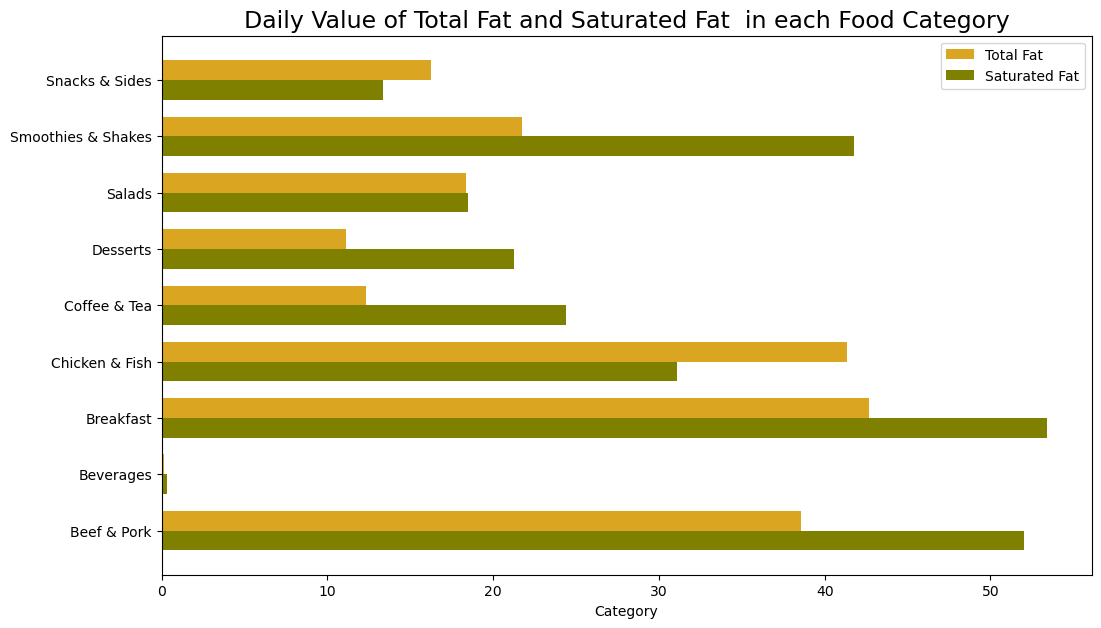

In [15]:
n=9
r = np.arange(n)
height = 0.35
plt.figure(figsize=(12,7))
plt.barh(r +0.5*height,fat["Total Fat (% Daily Value)"],height, label = 'Total Fat', color='goldenrod')
plt.barh(r -0.5*height ,fat["Saturated Fat (% Daily Value)"],height, label = 'Saturated Fat', color='olive')
plt.yticks(r, fat['Category'])
plt.xlabel('Category')
plt.legend()
plt.title('Daily Value of Total Fat and Saturated Fat  in each Food Category', fontsize=17)
plt.show()

In [16]:
data.sample(5).T

,60,26,117,114,235
Category,Chicken & Fish,Breakfast,Beverages,Beverages,Smoothies & Shakes
Item,Premium Grilled Chicken Club Sandwich,"Steak, Egg & Cheese Bagel",Diet Coke (Child),Diet Coke (Small),Strawberry Banana Smoothie (Small)
Serving Size,8.3 oz (235 g),8.5 oz (241 g),12 fl oz cup,16 fl oz cup,12 fl oz cup
Calories,510,670,0,0,210
Calories from Fat,180,310,0,0,5
Total Fat,20.0,35.0,0.0,0.0,0.5
Total Fat (% Daily Value),31,53,0,0,1
Saturated Fat,7.0,13.0,0.0,0.0,0.0
Saturated Fat (% Daily Value),36,63,0,0,0
Trans Fat,0.0,1.5,0.0,0.0,0.0


What Food has the most calories?


In [17]:
high_calories = data.groupby('Calories')['Item'].max().tail(10).reset_index()
high_calories

,Calories,Item
0,810,McFlurry with Reese's Peanut Butter Cups (Medium)
1,820,Vanilla Shake (Large)
2,850,Strawberry Shake (Large)
3,930,McFlurry with M&M’s Candies (Medium)
4,940,Chicken McNuggets (20 piece)
5,990,Big Breakfast with Hotcakes and Egg Whites (Re...
6,1050,Big Breakfast with Hotcakes and Egg Whites (La...
7,1090,Big Breakfast with Hotcakes (Regular Biscuit)
8,1150,Big Breakfast with Hotcakes (Large Biscuit)
9,1880,Chicken McNuggets (40 piece)


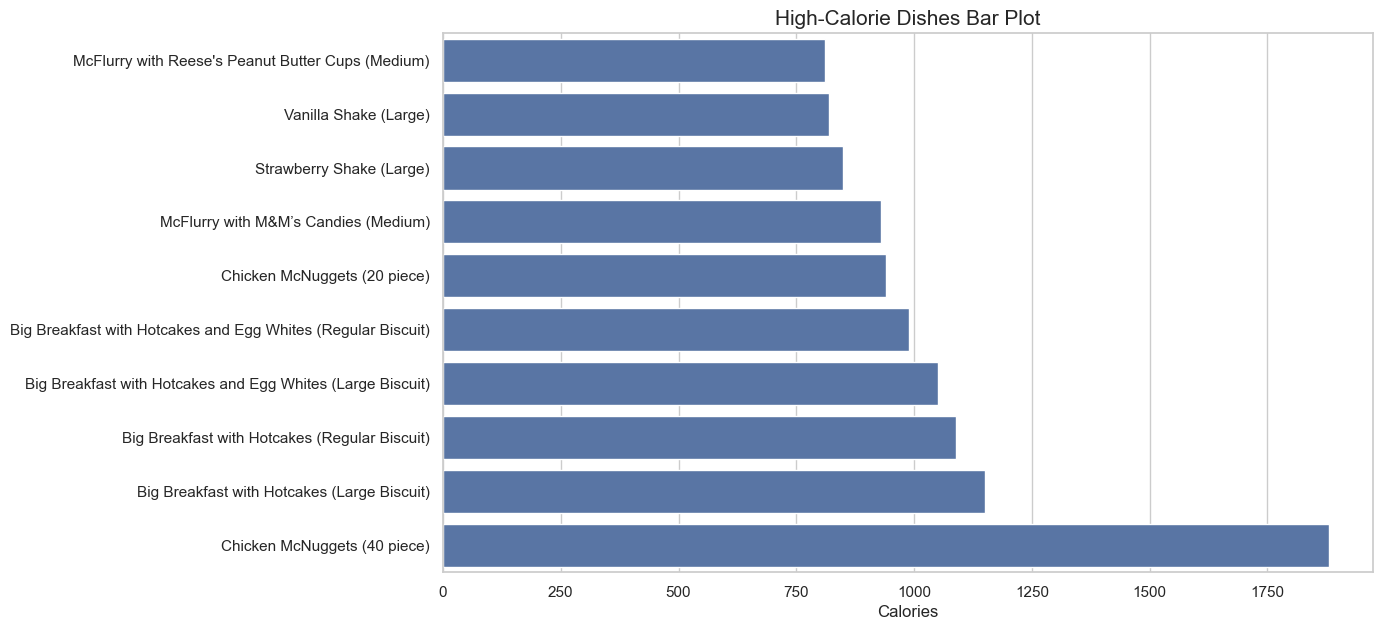

In [18]:
plt.figure(figsize=(12,7))
sns.set_theme(style="whitegrid")
sns.barplot(data=high_calories, x='Calories', y='Item' , color='b')
plt.ylabel("")
plt.title("High-Calorie Dishes Bar Plot", fontsize=15)
plt.show()

<Figure size 1200x700 with 0 Axes>

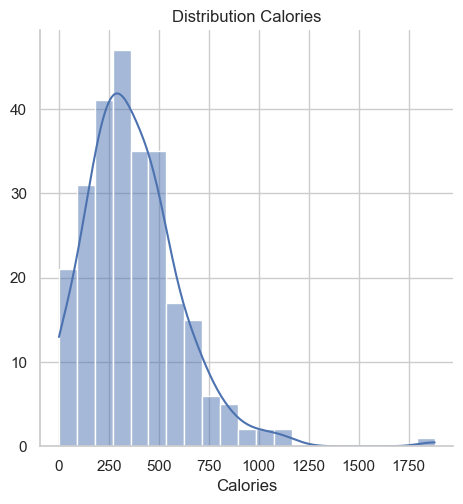

In [19]:
plt.figure(figsize=(12,7))
sns.displot(data["Calories"], kde=True)
plt.ylabel('')
plt.title("Distribution Calories")
plt.show()


In [20]:
high_protein = data.groupby('Protein')['Item'].max().tail(10).reset_index()
high_protein

,Protein,Item
0,32,Premium McWrap Chicken & Bacon (Crispy Chicken)
1,33,"Steak, Egg & Cheese Bagel"
2,35,Big Breakfast with Hotcakes and Egg Whites (Re...
3,36,Premium McWrap Chicken & Bacon (Grilled Chicken)
4,37,Quarter Pounder with Bacon Habanero Ranch
5,39,Bacon Clubhouse Burger
6,40,Premium Grilled Chicken Club Sandwich
7,44,Chicken McNuggets (20 piece)
8,48,Double Quarter Pounder with Cheese
9,87,Chicken McNuggets (40 piece)


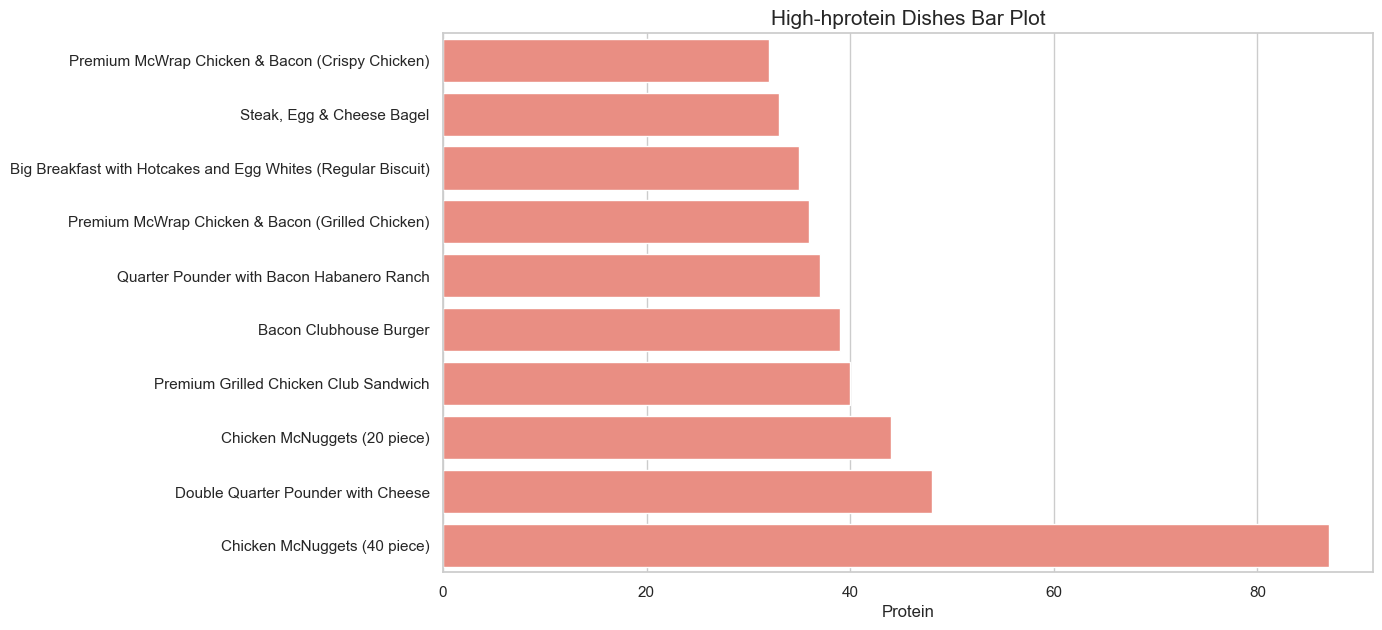

In [21]:
plt.figure(figsize=(12,7))
sns.set_theme(style="whitegrid")
sns.barplot(data=high_protein, x='Protein', y='Item' , color='salmon')
plt.ylabel("")
plt.title("High-hprotein Dishes Bar Plot", fontsize=15)
plt.show()